# 8. Machine Learning Models for Geospatial
## 8.1 Preparation
#### 8.1.1 Feature Engineering

In [1]:
import numpy as np
import geopandas as gpd

stp_cenacs = gpd.read_file('./data/stpete_cenacs_2014_norms.shp')
stp_cenacs["x"] = stp_cenacs.centroid.map(lambda p: p.x)
stp_cenacs["y"] = stp_cenacs.centroid.map(lambda p: p.y)
stp_cenacs_x = stp_cenacs[['AVE_FAM_SZ', 'AVE_HH_SZ', 'MED_AGE', 'x', 'y']]
stp_cenacs_x

,AVE_FAM_SZ,AVE_HH_SZ,MED_AGE,x,y
0,1.982456,1.61,50,-82.644603,27.773496
1,3.156863,1.88,49,-82.640504,27.747411
2,3.564334,2.75,40,-82.724487,27.814563
3,2.309091,1.53,40,-82.633208,27.783155
4,4.600000,3.09,38,-82.644499,27.744836
5,3.193548,2.23,41,-82.633661,27.790235
6,2.884696,2.21,43,-82.621067,27.799536
7,3.409266,2.03,40,-82.637674,27.811430
8,3.271709,2.67,44,-82.629787,27.825278
9,3.236486,2.36,28,-82.636615,27.839523


#### 8.2 Model Specification

In [4]:
from sklearn.cross_validation import train_test_split
FIGSIZE = (11, 7)
# # split 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(stp_cenacs_x,
                                                    stp_cenacs['MEDHHINC'],
                                                    test_size=0.2,
                                                    random_state=1)
names = stp_cenacs_x.columns.values
X_train

/home/tankofvines/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,AVE_FAM_SZ,AVE_HH_SZ,MED_AGE,x,y
95,2.833333,2.07,54,-82.627356,27.748487
28,4.533708,3.07,32,-82.665337,27.766201
16,3.307895,2.41,39,-82.684861,27.778690
118,3.889328,3.12,35,-82.650821,27.793878
162,2.535714,1.87,61,-82.628092,27.839580
114,3.719780,2.97,43,-82.658906,27.750224
107,3.366733,2.73,41,-82.607574,27.814089
69,3.280423,2.85,42,-82.656043,27.731139
47,4.196078,3.28,33,-82.651390,27.754842
124,3.100629,2.01,44,-82.654895,27.780355


In [5]:
import pandas as pd
X_df = pd.DataFrame(data=X_train, columns=names)
X_df['MEDHHINC'] = y_train
_ = X_df.hist(column=['AVE_FAM_SZ', 'AVE_HH_SZ', 'MED_AGE', 'x', 'y'], figsize=FIGSIZE)

In [6]:
def deviance_plot(est, X_test, y_test, ax=None, label='', train_color='#2c7bb6', 
                  test_color='#d7191c', alpha=1.0, ylim=(0, 10)):
    """Deviance plot for ``est``, use ``X_test`` and ``y_test`` for test error. """
    n_estimators = len(est.estimators_)
    test_dev = np.empty(n_estimators)

    for i, pred in enumerate(est.staged_predict(X_test)):
       test_dev[i] = est.loss_(y_test, pred)

    if ax is None:
        fig = plt.figure(figsize=FIGSIZE)
        ax = plt.gca()
        
    ax.plot(np.arange(n_estimators) + 1, test_dev, color=test_color, label='Test %s' % label, 
             linewidth=2, alpha=alpha)
    ax.plot(np.arange(n_estimators) + 1, est.train_score_, color=train_color, 
             label='Train %s' % label, linewidth=2, alpha=alpha)
    ax.set_ylabel('Error')
    ax.set_xlabel('n_estimators')
    ax.set_ylim(ylim)
    return test_dev, ax

In [7]:
import time
from sklearn.ensemble import GradientBoostingRegressor
from collections import defaultdict
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVR

res = defaultdict(dict)

def benchmark(est, name=None):
    if not name:
        name = est.__class__.__name__
    t0 = time.clock()
    est.fit(X_train, y_train)
    res[name]['train_time'] = time.clock() - t0
    t0 = time.clock()
    pred = est.predict(X_test)
    res[name]['test_time'] = time.clock() - t0
    res[name]['MAE'] = mean_absolute_error(y_test, pred)
    return est
    
benchmark(DummyRegressor())
benchmark(Ridge(alpha=0.0001, normalize=True))
benchmark(Pipeline([('std', StandardScaler()), 
                    ('svr', SVR(kernel='rbf', C=10.0, gamma=0.1, tol=0.001))]), name='SVR')
benchmark(RandomForestRegressor(n_estimators=100, max_features=5, random_state=0, 
                                bootstrap=False, n_jobs=4))
est = benchmark(GradientBoostingRegressor(n_estimators=500, max_depth=4, learning_rate=0.1,
                                          loss='huber', min_samples_leaf=3, 
                                          random_state=0))

res_df = pd.DataFrame(data=res).T
res_df[['train_time', 'test_time', 'MAE']].sort('MAE', ascending=False)

/home/tankofvines/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:37: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,train_time,test_time,MAE
RandomForestRegressor,0.180874,0.019151,16905.591702
DummyRegressor,0.000184,0.000160,15605.617715
SVR,0.002467,0.000426,14376.147740
Ridge,0.000620,0.000110,11424.377949
GradientBoostingRegressor,0.348007,0.000750,10987.085464


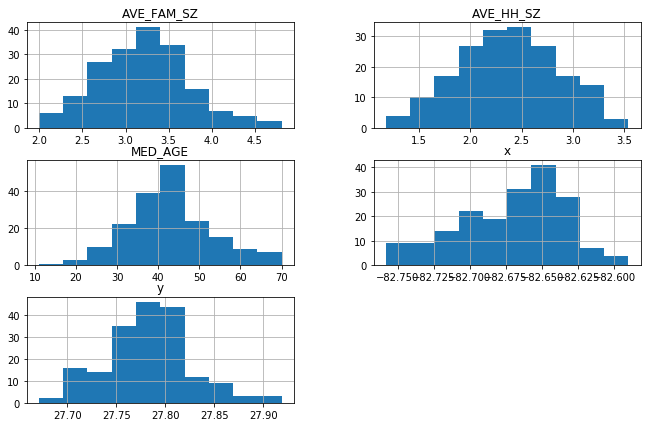

In [8]:
% matplotlib inline
import pandas as pd
X_df = pd.DataFrame(data=X_train, columns=names)
X_df['MEDHHINC'] = y_train
_ = X_df.hist(column=['AVE_FAM_SZ', 'AVE_HH_SZ', 'MED_AGE', 'x', 'y'], figsize=FIGSIZE)

/home/tankofvines/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


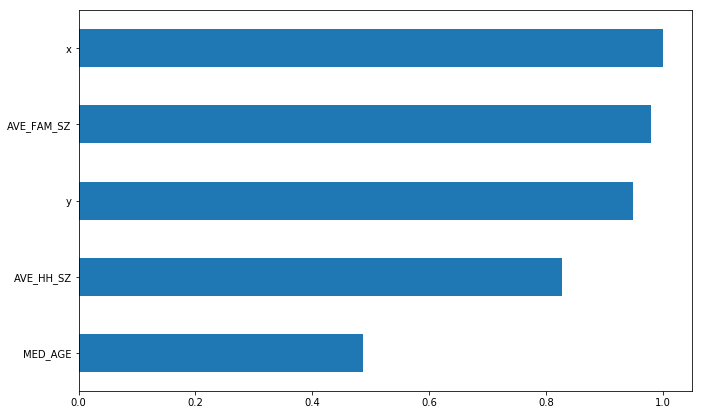

In [9]:
fx_imp = pd.Series(est.feature_importances_, index=names)
fx_imp /= fx_imp.max()  # normalize
fx_imp.sort()
fx_imp.plot(kind='barh', figsize=FIGSIZE)

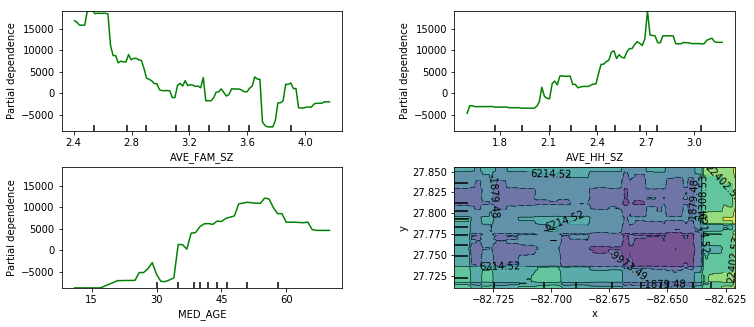

In [10]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

features = ['AVE_FAM_SZ', 'AVE_HH_SZ', 'MED_AGE',
            ('x', 'y')]
fig, axs = plot_partial_dependence(est, X_train, features, feature_names=names, 
                                   n_cols=2, figsize=FIGSIZE)